In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

# Grafico de barras

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Survived.unique()

array([0, 1])

In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_n=df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


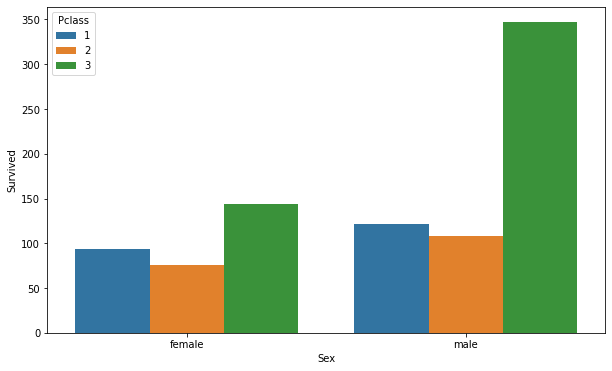

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df_n);

Miremos un ejemplo con Bokeh

In [7]:
df_x=df[['Survived','Pclass']].groupby(by=['Pclass']).count().reset_index()
df_x['Pclass']=df_x['Pclass'].astype('str') 
df_x.head()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [8]:
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool 
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

In [9]:
source = ColumnDataSource(data=dict(Pclass=df_x.Pclass, counts=df_x.Survived, color=Spectral6))
p = figure(x_range=df_x.Pclass, plot_height=250, title="Clases involucradas")
p.vbar(x='Pclass', top='counts', width=0.9, color='color', legend="Pclass", source=source)
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Clase"
p.yaxis.axis_label = "Frecuencia"
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
p.add_tools(HoverTool())
show(p)
output_file("stacked.html") # Si la quieren guardar


Grafico de barras acoplado con una tercera variable 

# Histogramas

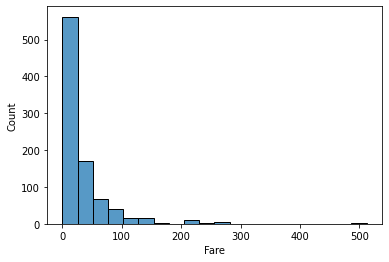

In [10]:
sns.histplot(data=df, x="Fare",bins=20)

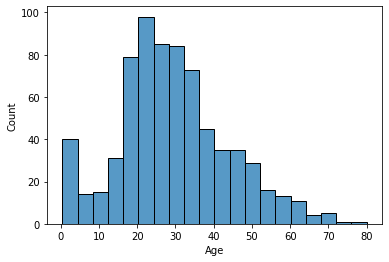

In [11]:
sns.histplot(data=df, x="Age",bins=20)

Ahora con Bokeh

In [12]:
import numpy as np
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure
data = df.Age.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(plot_height=300,plot_width=500, title='Histograma de edades')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

In [13]:
data = df.Fare.values
data=data[~np.isnan(data)]
hist, edges = np.histogram(data, density=True, bins=20)
p = figure(plot_height=300,plot_width=500, title='Histograma de tarifas')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Tarifa (USD)"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

# Lineplot

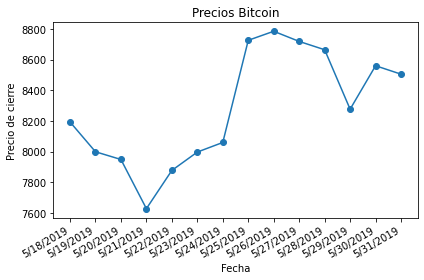

In [14]:
data=pd.read_csv('/content/Time Series Data.csv') # Leer el archivo
price_date=data['Date'] # extraer dos vectores uno para la fecha
price_close=data['Close'] # extraer el precio de cierre en vector
plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo
plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Precios Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.tight_layout() # Ajustar los ejes 
plt.show() # mostrar la grafica

In [15]:
data.Date= pd.to_datetime(data.Date)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321
5,2019-05-23,7876.500000,8165.450195,7801.569824,7996.399902,7996.399902,413162746
6,2019-05-24,7996.399902,8140.819824,7948.680176,8059.129883,8059.129883,179206342
7,2019-05-25,8059.129883,8779.000000,7894.529785,8726.230469,8726.230469,483663699
8,2019-05-26,8726.230469,8931.530273,8668.459961,8785.169922,8785.169922,507164714
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199


In [16]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199
10,2019-05-28,8718.849609,8760.480469,8444.099609,8664.559570,8664.559570,380343928
11,2019-05-29,8664.559570,9065.889648,8027.209961,8276.250000,8276.250000,815525590
12,2019-05-30,8276.250000,8570.780273,8116.000000,8560.080078,8560.080078,500141087
13,2019-05-31,8550.629883,8576.339844,8459.650391,8504.980469,8504.980469,69915456


Ahora con Bokeh

In [17]:
from bokeh.models import DatetimeTickFormatter
data.Date= pd.to_datetime(data.Date) # Convertir a Datetime
line_plot = figure(plot_width=600, plot_height=500, title='Line plot', 
                   x_axis_label='Fecha', y_axis_label='Precio',x_axis_type='datetime')
line_plot.line(data.Date, data['Open'], legend='Open', line_width=2)
line_plot.line(data.Date, data['High'], legend='High', line_width=2,color='red')
line_plot.line(data.Date, data['Low'], legend='Low', line_width=2,color='green')
line_plot.line(data.Date, data['Close'], legend='Close', line_width=2,color='yellow')
line_plot.xaxis.formatter=DatetimeTickFormatter(
        hours=["%d %B %Y"],
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"])
line_plot.add_tools(HoverTool())
line_plot.legend.location = "top_left"
show(line_plot)

# Diagrama de dispersion

Text(0, 0.5, 'Precio de apertura')

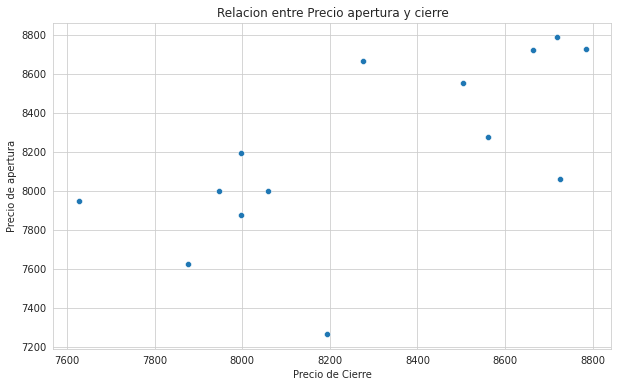

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open)
plt.title('Relacion entre Precio apertura y cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

In [19]:
np.corrcoef(data.Close, data.Open)[0,1]

0.646006168285023

In [20]:
# Matriz de correlacion
import numpy as np
np.corrcoef(data.Close, data.Open)

array([[1.        , 0.64600617],
       [0.64600617, 1.        ]])

In [21]:
# Seleccion de datos
from bokeh.models import Range1d
x_scatter = data.Close # Data en x
y_scatter = data.Open # data en y
# Grafico (Fondo)
scatter_plot = figure(plot_width=700, plot_height=300, x_axis_label='Close', y_axis_label='Open', title='Dispersion Open vs Close')
# Scatter plot
scatter_plot.circle(x_scatter, y_scatter, size=5, line_color='navy', fill_color='orange', fill_alpha=0.5)
# Agregar opcion interactiva
scatter_plot.add_tools(HoverTool())
# Mostrar
scatter_plot.y_range= Range1d(7400, 8800) # Definir limites
show(scatter_plot)

# Boxplot 

Text(0, 0.5, 'Tarifa')

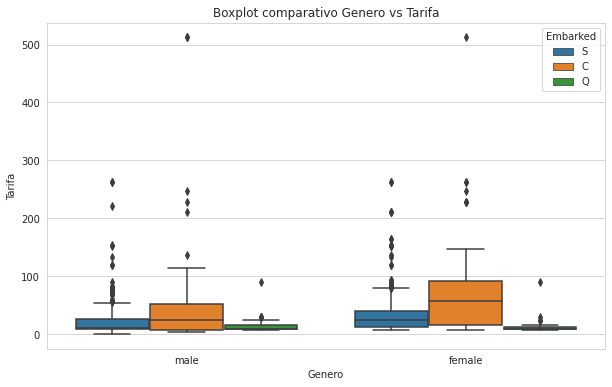

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

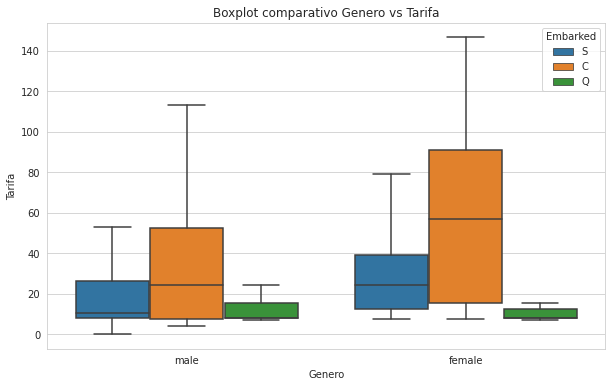

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked,showfliers=False)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

Text(0, 0.5, 'Tarifa')

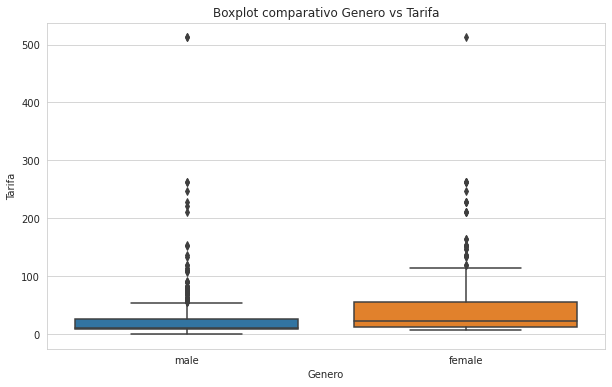

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')

In [25]:
groups = df[['Sex','Fare']].groupby('Sex')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
# Encontrar outliers en cada categoria
def outliers(group):
    cat = group.name
    return group[(group.Fare > upper.loc[cat]['Fare']) | (group.Fare < lower.loc[cat]['Fare'])]['Fare']
out = groups.apply(outliers).dropna()
# Preparar outliers para plot, coordenadas para cada outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)
# Categorias
cats= ['female','male']
p = figure(background_fill_color="#efefef", x_range=cats, title='Comparacion tarifas por genero')
# Si no hay outliers recortar entre min y max
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'Fare']),upper.Fare)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'Fare']),lower.Fare)]
# stems
p.segment(cats, upper.Fare, cats, q3.Fare, line_color="black")
p.segment(cats, lower.Fare, cats, q1.Fare, line_color="black")
# boxes
p.vbar(cats, 0.7, q2.Fare, q3.Fare, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.Fare, q2.Fare, fill_color="#3B8686", line_color="black")
# whiskers
p.rect(cats, lower.Fare, 0.2, 0.01, line_color="black")
p.rect(cats, upper.Fare, 0.2, 0.01, line_color="black")
# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

#p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"
p.xaxis.axis_label ='Genero'
p.yaxis.axis_label='Fare'
p.add_tools(HoverTool())
show(p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


# Graficos de 3 dimensiones

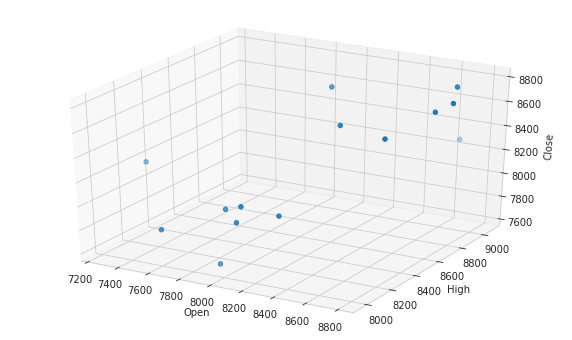

In [26]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = data.Open
y = data.High
z = data.Close

ax.set_xlabel("Open")
ax.set_ylabel("High")
ax.set_zlabel("Close")

ax.scatter(x, y, z)

plt.show()

# Radar plot

In [27]:
# Obtener los datos
from vega_datasets import data

# Mostrar los datos
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [28]:
# Atributos para el radar plot.
factors = ['Acceleration', 'Displacement', 'Horsepower',
           'Miles_per_Gallon', 'Weight_in_lbs']

# Nueva escala de 0 a 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Hacer una transformacion lineal para cada variable a [0, 100].
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)


# Añadir el año a cada nombre del carro 
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)

# recortar y cambiar el nombre.
dft = df.loc[:, ['Car Model', 'Acceleration_Adj', 'Displacement_Adj',
                 'Horsepower_Adj', 'Miles_per_Gallon_Adj',
                 'Weight_in_lbs_Adj']]

dft.rename(columns={
    'Acceleration_Adj': 'Acceleration',
    'Displacement_Adj': 'Displacement',
    'Horsepower_Adj': 'Horsepower',
    'Miles_per_Gallon_Adj': 'MPG',
    'Weight_in_lbs_Adj': 'Weight'
}, inplace=True)

dft.set_index('Car Model', inplace=True)

dft.head()


,Acceleration,Displacement,Horsepower,MPG,Weight
Car Model,,,,,
chevrolet chevelle malibu 1970,23.809524,61.757106,45.652174,23.936170,53.614970
buick skylark 320 1970,20.833333,72.868217,64.673913,15.957447,58.973632
plymouth satellite 1970,17.857143,64.599483,56.521739,23.936170,51.686986
amc rebel sst 1970,23.809524,60.981912,56.521739,18.617021,51.601928
ford torino 1970,14.880952,60.465116,51.086957,21.276596,52.055571


(<a list of 12 Line2D ticklines objects>,
 <a list of 6 Text major ticklabel objects>)

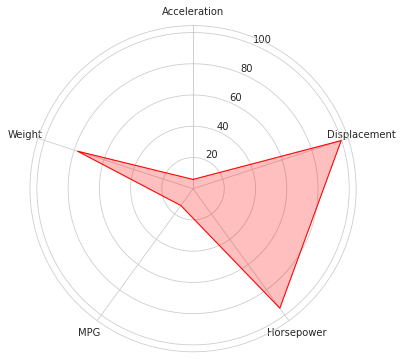

In [29]:
# atributos para el radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Hacer el grafico del 1970 Chevy Impala
values = dft.loc['chevrolet impala 1970'].tolist()

# Numero de variables a plot.
num_vars = len(labels)

# Dividir el circulo en partes iguales y sacar los angulos 
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Completar el loop y agregar el primer valor al ultimo
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Grafiar los datos
ax.plot(angles, values, color='red', linewidth=1)

# LLenarlos
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Poner los labels
ax.set_thetagrids(np.degrees(angles), labels)


Mejor. Algunas cosas cambiaron aquí:

1. Nuestro primer eje comienza justo a las 12 en punto (o cero grados)
2. Nuestros ejes están ordenados en el sentido de las agujas del reloj, de acuerdo con la lista de atributos que alimentamos
3. Tenemos etiquetas tanto para los ejes como para las líneas de cuadrícula.
4. Los ejes y la forma roja ahora están alineados

# Graficos de Chernoff

In [30]:
pip install ChernoffFace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from ChernoffFace import *
import numpy
import matplotlib.cm
# Generar datos artificiales
numpy.random.seed(32)
data = numpy.random.rand(16, 12)
data.shape

(16, 12)

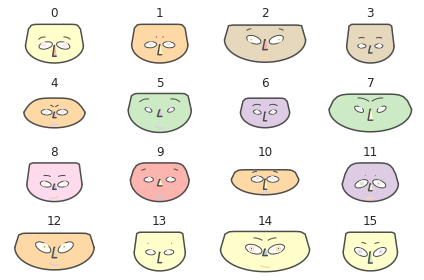

In [32]:
fig = chernoff_face(data=data, 
                    titles=[str(x) for x in list(range(len(data)))], 
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

In [33]:
# Con los datos reales
prueba= df[0:400:30]
prueba= prueba[['Name','Miles_per_Gallon','Cylinders','Displacement','Weight_in_lbs','Acceleration']]
prueba.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Weight_in_lbs,Acceleration
0,chevrolet chevelle malibu,18.0,8,307.0,3504,12.0
30,amc gremlin,21.0,6,199.0,2648,15.0
60,toyota corolla 1200,31.0,4,71.0,1773,19.0
90,dodge colt (sw),28.0,4,98.0,2164,15.0
120,mercury capri v6,21.0,6,155.0,2472,14.0


In [34]:
datos= prueba.drop(columns=['Name'])
datos= np.array(datos)
etiquetas= prueba.Name

In [35]:
datos

array([[  18. ,    8. ,  307. , 3504. ,   12. ],
       [  21. ,    6. ,  199. , 2648. ,   15. ],
       [  31. ,    4. ,   71. , 1773. ,   19. ],
       [  28. ,    4. ,   98. , 2164. ,   15. ],
       [  21. ,    6. ,  155. , 2472. ,   14. ],
       [  26. ,    4. ,   97. , 2300. ,   14.5],
       [  24. ,    4. ,  119. , 2545. ,   17. ],
       [  29.5,    4. ,   97. , 1825. ,   12.2],
       [  29. ,    4. ,   97. , 1940. ,   14.5],
       [  17.7,    6. ,  231. , 3445. ,   13.4],
       [  31.9,    4. ,   89. , 1925. ,   14. ],
       [  27.9,    4. ,  156. , 2800. ,   14.4],
       [  33. ,    4. ,  105. , 2190. ,   14.2],
       [  34. ,    4. ,  108. , 2245. ,   16.9]])

In [36]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
  
object= StandardScaler()
    
# estandarizacion
scale = object.fit_transform(datos) 
scale

array([[-1.63665853,  2.69194639,  2.64207663,  2.08096417, -1.51084642],
       [-1.06382805,  1.05337032,  0.95578711,  0.44887813,  0.15465357],
       [ 0.84560691, -0.58520574, -1.04277824, -1.21943411,  2.37532022],
       [ 0.27277642, -0.58520574, -0.62120586, -0.47393687,  0.15465357],
       [-1.06382805,  1.05337032,  0.26878027,  0.11330904, -0.40051309],
       [-0.10911057, -0.58520574, -0.63681965, -0.21463348, -0.12292976],
       [-0.49099756, -0.58520574, -0.29331623,  0.25249395,  1.2649869 ],
       [ 0.55919167, -0.58520574, -0.63681965, -1.12028869, -1.39981308],
       [ 0.46371992, -0.58520574, -0.63681965, -0.9010248 , -0.12292976],
       [-1.69394158,  1.05337032,  1.45542845,  1.96847226, -0.73361309],
       [ 1.01745605, -0.58520574, -0.76172999, -0.92962444, -0.40051309],
       [ 0.25368207, -0.58520574,  0.28439406,  0.7386878 , -0.17844643],
       [ 1.2274939 , -0.58520574, -0.51190932, -0.42436416, -0.28947976],
       [ 1.41843739, -0.58520574, -0.4

In [37]:
list(etiquetas)

['chevrolet chevelle malibu',
 'amc gremlin',
 'toyota corolla 1200',
 'dodge colt (sw)',
 'mercury capri v6',
 'opel manta',
 'datsun 710',
 'volkswagen rabbit',
 'volkswagen rabbit custom',
 'buick regal sport coupe (turbo)',
 'vw rabbit custom',
 'dodge colt',
 'volkswagen jetta',
 'toyota corolla']

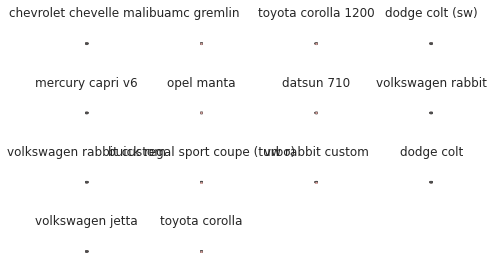

In [40]:
fig = chernoff_face(data=datos, 
                    titles=list(etiquetas), 
                    color_mapper=matplotlib.cm.Pastel1)

# Mostrarlo
fig.tight_layout()
matplotlib.pyplot.show()

En este caso los autos tienes variables similares por ende no se logran ver cambios notorios en los atributos 